In [2]:
!pip uninstall torch --yes
!pip uninstall torchvision --yes

Found existing installation: torch 1.9.0+cu102
Uninstalling torch-1.9.0+cu102:
  Successfully uninstalled torch-1.9.0+cu102
Found existing installation: torchvision 0.10.0+cu102
Uninstalling torchvision-0.10.0+cu102:
  Successfully uninstalled torchvision-0.10.0+cu102


In [3]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
  Using cached https://download.pytorch.org/whl/cu113/torch-1.11.0%2Bcu113-cp37-cp37m-linux_x86_64.whl (1637.0 MB)
  Using cached https://download.pytorch.org/whl/cu113/torchvision-0.12.0%2Bcu113-cp37-cp37m-linux_x86_64.whl (22.3 MB)
  Using cached https://download.pytorch.org/whl/cu113/torchaudio-0.11.0%2Bcu113-cp37-cp37m-linux_x86_64.whl (2.9 MB)
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.9.0
    Uninstalling torchaudio-0.9.0:
      Successfully uninstalled torchaudio-0.9.0
You should consider upgrading via the '/home/genex/jnotebook/venv/bin/python3 -m pip install --upgrade pip' command.


In [4]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
import torchinfo
from torchvision import datasets, models, transforms
from torchinfo import summary
import matplotlib.pyplot as plt
import time
import os
import copy
import cv2
import face_recognition
import random
import shutil
from facenet_pytorch import MTCNN, InceptionResnetV1
mtcnn = MTCNN(margin=40,image_size=160,keep_all=True,select_largest=False, post_process=False,device='cuda:0')
plt.ion() 
torch.manual_seed(17)

In [5]:
print(torchvision.__version__)

0.12.0+cu113


In [6]:
dir = '/home/genex/jnotebook/liveliness3'
train_dir = os.path.join(dir, 'train')
val_dir = os.path.join(dir, 'test')
c=0
for ff in os.listdir(dir):
    for sfolder in os.listdir(os.path.join(dir,ff)):
#         print(folder)
#         for sfolder in os.listdir(os.path.join(os.path.join(dir,ff),folder)):
                print(sfolder)
                if sfolder == 'live':
        
                    for file in os.listdir(os.path.join(os.path.join(dir,ff),sfolder)):
#                     print(file)
                        if file.split('.')[1] == 'jpg' or file.split('.')[1] == 'png' or file.split('.')[1] == 'jpeg':
                            print("1")
                            img = cv2.imread(f'liveliness3/{ff}/{sfolder}/{file}')
                            cv2.imwrite(f'livelinessData2/train/real/{file}', img)
                            c=c+1
                            if c > 1700:
                                break
                        
            

spoof
live
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
spoof
live
1
1
1
1
1
1
1
1
1
spoof
live
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
spoof
live
1
1
1
1
1
spoof
live
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
spoof
live
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
spoof
live
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
spoof
live
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
spoof
live
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
spoof
live
1
1
1
1
1
1
1
spoof
live
1
1
1
1
1
1
1
spoof
live
1
1
1
1
1
1
1
1
1
1
1
1
spoof
live
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
spoof
live
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
spoof
live
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
spoof
live
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
spoof
live
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
spoof
live
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
spoof
live
1
1
1
1
1
1
1
1
1
1
1
1
spoof
live
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
spoof
live
1
1
1
1
1
1

In [29]:
import shutil, random, os
os.chdir('/home/genex/jnotebook')
root = '/home/genex/jnotebook'
dirpathroot = 'train_dir'
destDirectory = 'train_dirNew'
os.chdir(destDirectory)
for dirpath in os.listdir(os.path.join(root,dirpathroot)):
    
    filenames = random.sample(os.listdir(os.path.join(root,os.path.join(dirpathroot,dirpath))), 40)
    print(filenames)
    
    
    for fname in filenames:
        srcpath = os.path.join(root,os.path.join(dirpathroot,os.path.join(dirpath, fname)))
        shutil.copy(srcpath, dirpath)

['faruk125.jpeg', 'faruk9.jpeg', 'faruk230.jpeg', 'faruk103.jpeg', 'faruk268.jpeg', 'faruk263.jpeg', 'faruk107.jpeg', 'faruk104.jpeg', 'faruk90.jpeg', 'faruk94.jpeg', 'faruk154.jpeg', 'faruk66.jpeg', 'faruk170.jpeg', 'faruk177.jpeg', 'faruk241.jpeg', 'faruk267.jpeg', 'faruk161.jpeg', 'faruk235.jpeg', 'faruk175.jpeg', 'faruk37.jpeg', 'faruk82.jpeg', 'faruk197.jpeg', 'faruk47.jpeg', 'faruk88.jpeg', 'faruk247.jpeg', 'faruk232.jpeg', 'faruk196.jpeg', 'faruk115.jpeg', 'faruk292.jpeg', 'faruk75.jpeg', 'faruk234.jpeg', 'faruk289.jpeg', 'faruk187.jpeg', 'faruk64.jpeg', 'faruk284.jpeg', 'faruk145.jpeg', 'faruk121.jpeg', 'faruk15.jpeg', 'faruk233.jpeg', 'faruk22.jpeg']
['labib58.jpeg', 'labib1.jpeg', 'labib252.jpeg', 'labib116.jpeg', 'labib45.jpeg', 'labib27.jpeg', 'labib152.jpeg', 'labib296.jpeg', 'labib279.jpeg', 'labib283.jpeg', 'labib19.jpeg', 'labib125.jpeg', 'labib267.jpeg', 'labib193.jpeg', 'labib74.jpeg', 'labib138.jpeg', 'labib208.jpeg', 'labib131.jpeg', 'labib234.jpeg', 'labib222.jpeg'

ValueError: Sample larger than population or is negative

In [11]:
dir = '/home/genex/jnotebook/livelinessData2'
for ff in os.listdir(dir):
    for folder in os.listdir(os.path.join(dir,ff)):
        if folder == 'real' and ff == 'val':
            filenames = random.sample(os.listdir(os.path.join(os.path.join(dir,ff),folder)), 120)
            for i in range(len(filenames)):
                os.remove(f'/home/genex/jnotebook/livelinessData2/val/real/{filenames[i]}')
#             for sf in os.listdir(os.path.join(os.path.join(dir,ff),folder)):
                

In [7]:
dir = '/home/genex/jnotebook/livelinessData2'
c=0
train_dir = os.path.join(dir, 'train')
val_dir = os.path.join(dir, 'test')
for ff in os.listdir(dir):
    for folder in os.listdir(os.path.join(dir,ff)):
        c=0
        print(folder+' '+ff)
        for file in os.listdir(os.path.join(os.path.join(dir,ff),folder)):
            c=c+1
        print(c)

.ipynb_checkpoints val
0
spoof val
2006
real val
2011
.ipynb_checkpoints train
0
spoof train
5559
real train
5795


In [4]:
dir = '/home/genex/jnotebook/antispoofing_dataset'
c=0
train_dir = os.path.join(dir, 'train')
val_dir = os.path.join(dir, 'test')
for ff in os.listdir(dir):
    for folder in os.listdir(os.path.join(dir,ff)):
        c=0
        print(folder+' '+ff)
        for file in os.listdir(os.path.join(os.path.join(dir,ff),folder)):
            c=c+1
        print(c)

spoof val
581
real val
519
spoof train
1987
real train
2081


In [41]:
os.chdir('/home/genex/jnotebook/')
img = cv2.imread('Fuad.jpg')
img = mtcnn(img, 'tttt.jpg')
print(os.getcwd())

/home/genex/jnotebook


In [5]:
dir = 'train_dirNew/204_Reyad'
# for sub in os.listdir(dir):
#     for ssub in os.listdir(os.path.join(dir,sub)):
# for file in os.listdir(os.path.join(dir,os.path.join(sub,ssub))):
    #print(file)
for file in os.listdir(dir):
# #     for file in os.listdir(os.path.join(dir, sub)):
        frame = cv2.imread(f'{dir}/{file}')
#         frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         cv2.imwrite(f'train_dirNew/Unknown/{file}', frame)
        if frame is not None:
            img = mtcnn(frame, f'{dir}/{file}')

#             for i in range(len(faces)):
#                         faces[i] = faces[i][0]*4,faces[i][1]*4,faces[i][2]*4,faces[i][3]*4 
#             for (y1,x2,y2,x1) in faces:  
#                 face = frame[y1-20:y2+40,x1-10:x2+10] 
#                 path = f'antispoofing_dataset2/train/spoof/{file}'
#                 cv2.imwrite(path, face)
#                 print(path)



/home/genex/jnotebook/venv/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [42]:
dir = 'antispoofing_dataset'
# for sub in os.listdir(dir):
#     for ssub in os.listdir(os.path.join(dir,sub)):
# for file in os.listdir(os.path.join(dir,os.path.join(sub,ssub))):
    #print(file)
for file in os.listdir('antispoofing_dataset/train/spoof/'):
    frame = cv2.imread(f'antispoofing_dataset/train/spoof/{file}')
    if frame is not None:
        width = int(frame.shape[1] * .25)
        height = int(frame.shape[0] * .25)
        dim = (width, height)
        frame = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
        faces = face_recognition.face_locations(frame, model = 'cnn')
        width = int(frame.shape[1] * 4)
        height = int(frame.shape[0] * 4)
        dim = (width, height)
        frame = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
        for i in range(len(faces)):
                    faces[i] = faces[i][0]*4,faces[i][1]*4,faces[i][2]*4,faces[i][3]*4 
        for (y1,x2,y2,x1) in faces:  
            face = frame[y1-20:y2+40,x1-10:x2+10] 
            path = f'antispoofing_dataset2/train/spoof/{file}'
            cv2.imwrite(path, face)
            print(path)

antispoofing_dataset2/train/spoof/s33119.jpeg
antispoofing_dataset2/train/spoof/s2784.jpeg
antispoofing_dataset2/train/spoof/s11115.jpeg
antispoofing_dataset2/train/spoof/s22122.jpeg
antispoofing_dataset2/train/spoof/s3554.jpeg
antispoofing_dataset2/train/spoof/s22203.jpeg
antispoofing_dataset2/train/spoof/s34167.jpeg
antispoofing_dataset2/train/spoof/s339.jpeg
antispoofing_dataset2/train/spoof/s22208.jpeg
antispoofing_dataset2/train/spoof/s22224.jpeg
antispoofing_dataset2/train/spoof/s11262.jpeg
antispoofing_dataset2/train/spoof/s23151.jpeg
antispoofing_dataset2/train/spoof/s2228.jpeg
antispoofing_dataset2/train/spoof/s1155.jpeg
antispoofing_dataset2/train/spoof/s37169.jpeg
antispoofing_dataset2/train/spoof/s33241.jpeg
antispoofing_dataset2/train/spoof/s3742.jpeg
antispoofing_dataset2/train/spoof/s23177.jpeg
antispoofing_dataset2/train/spoof/s11116.jpeg
antispoofing_dataset2/train/spoof/s1161.jpeg
antispoofing_dataset2/train/spoof/s2824.jpeg
antispoofing_dataset2/train/spoof/s26169.jp

antispoofing_dataset2/train/spoof/s3369.jpeg
antispoofing_dataset2/train/spoof/s2377.jpeg
antispoofing_dataset2/train/spoof/s37131.jpeg
antispoofing_dataset2/train/spoof/s11269.jpeg
antispoofing_dataset2/train/spoof/s2689.jpeg
antispoofing_dataset2/train/spoof/s23217.jpeg
antispoofing_dataset2/train/spoof/s11252.jpeg
antispoofing_dataset2/train/spoof/s3457.jpeg
antispoofing_dataset2/train/spoof/s37125.jpeg
antispoofing_dataset2/train/spoof/s33107.jpeg
antispoofing_dataset2/train/spoof/s3561.jpeg
antispoofing_dataset2/train/spoof/s22222.jpeg
antispoofing_dataset2/train/spoof/s25171.jpeg
antispoofing_dataset2/train/spoof/s11130.jpeg
antispoofing_dataset2/train/spoof/s37123.jpeg
antispoofing_dataset2/train/spoof/s28107.jpeg
antispoofing_dataset2/train/spoof/s33233.jpeg
antispoofing_dataset2/train/spoof/s23219.jpeg
antispoofing_dataset2/train/spoof/s2895.jpeg
antispoofing_dataset2/train/spoof/s269.jpeg
antispoofing_dataset2/train/spoof/s1174.jpeg
antispoofing_dataset2/train/spoof/s23131.jp

antispoofing_dataset2/train/spoof/s3428.jpeg
antispoofing_dataset2/train/spoof/s3555.jpeg
antispoofing_dataset2/train/spoof/s2287.jpeg
antispoofing_dataset2/train/spoof/s33243.jpeg
antispoofing_dataset2/train/spoof/s2473.jpeg
antispoofing_dataset2/train/spoof/s22170.jpeg
antispoofing_dataset2/train/spoof/s3778.jpeg
antispoofing_dataset2/train/spoof/s352.jpeg
antispoofing_dataset2/train/spoof/s332.jpeg
antispoofing_dataset2/train/spoof/s2837.jpeg
antispoofing_dataset2/train/spoof/s35103.jpeg
antispoofing_dataset2/train/spoof/s11266.jpeg
antispoofing_dataset2/train/spoof/s27146.jpeg
antispoofing_dataset2/train/spoof/s2496.jpeg
antispoofing_dataset2/train/spoof/s23213.jpeg
antispoofing_dataset2/train/spoof/s2851.jpeg
antispoofing_dataset2/train/spoof/s3744.jpeg
antispoofing_dataset2/train/spoof/s33127.jpeg
antispoofing_dataset2/train/spoof/s33105.jpeg
antispoofing_dataset2/train/spoof/s33286.jpeg
antispoofing_dataset2/train/spoof/s3343.jpeg
antispoofing_dataset2/train/spoof/s1159.jpeg
ant

antispoofing_dataset2/train/spoof/s22133.jpeg
antispoofing_dataset2/train/spoof/s37117.jpeg
antispoofing_dataset2/train/spoof/s33110.jpeg
antispoofing_dataset2/train/spoof/s28135.jpeg
antispoofing_dataset2/train/spoof/s26106.jpeg
antispoofing_dataset2/train/spoof/s226.jpeg
antispoofing_dataset2/train/spoof/s3591.jpeg
antispoofing_dataset2/train/spoof/s2612.jpeg
antispoofing_dataset2/train/spoof/s2523.jpeg
antispoofing_dataset2/train/spoof/s34110.jpeg
antispoofing_dataset2/train/spoof/s3360.jpeg
antispoofing_dataset2/train/spoof/s35133.jpeg
antispoofing_dataset2/train/spoof/s28167.jpeg
antispoofing_dataset2/train/spoof/s11133.jpeg
antispoofing_dataset2/train/spoof/s2464.jpeg
antispoofing_dataset2/train/spoof/s28169.jpeg
antispoofing_dataset2/train/spoof/s22186.jpeg
antispoofing_dataset2/train/spoof/s26135.jpeg
antispoofing_dataset2/train/spoof/s2569.jpeg
antispoofing_dataset2/train/spoof/s11202.jpeg
antispoofing_dataset2/train/spoof/s34116.jpeg
antispoofing_dataset2/train/spoof/s26152.j

antispoofing_dataset2/train/spoof/s37191.jpeg
antispoofing_dataset2/train/spoof/s11219.jpeg
antispoofing_dataset2/train/spoof/s26165.jpeg
antispoofing_dataset2/train/spoof/s25125.jpeg
antispoofing_dataset2/train/spoof/s35116.jpeg
antispoofing_dataset2/train/spoof/s11224.jpeg
antispoofing_dataset2/train/spoof/s26180.jpeg
antispoofing_dataset2/train/spoof/s2412.jpeg
antispoofing_dataset2/train/spoof/s118.jpeg
antispoofing_dataset2/train/spoof/s37174.jpeg
antispoofing_dataset2/train/spoof/s11106.jpeg
antispoofing_dataset2/train/spoof/s2451.jpeg
antispoofing_dataset2/train/spoof/s23231.jpeg
antispoofing_dataset2/train/spoof/s34108.jpeg
antispoofing_dataset2/train/spoof/s22200.jpeg
antispoofing_dataset2/train/spoof/s33203.jpeg
antispoofing_dataset2/train/spoof/s2342.jpeg
antispoofing_dataset2/train/spoof/s3799.jpeg
antispoofing_dataset2/train/spoof/s25109.jpeg
antispoofing_dataset2/train/spoof/s3458.jpeg
antispoofing_dataset2/train/spoof/s22153.jpeg
antispoofing_dataset2/train/spoof/s34198.

antispoofing_dataset2/train/spoof/s2441.jpeg
antispoofing_dataset2/train/spoof/s34117.jpeg
antispoofing_dataset2/train/spoof/s22120.jpeg
antispoofing_dataset2/train/spoof/s3789.jpeg
antispoofing_dataset2/train/spoof/s2376.jpeg
antispoofing_dataset2/train/spoof/s33131.jpeg
antispoofing_dataset2/train/spoof/s11101.jpeg
antispoofing_dataset2/train/spoof/s271.jpeg
antispoofing_dataset2/train/spoof/s35108.jpeg
antispoofing_dataset2/train/spoof/s37154.jpeg
antispoofing_dataset2/train/spoof/s2763.jpeg
antispoofing_dataset2/train/spoof/s2676.jpeg
antispoofing_dataset2/train/spoof/s3487.jpeg
antispoofing_dataset2/train/spoof/s33133.jpeg
antispoofing_dataset2/train/spoof/s33137.jpeg
antispoofing_dataset2/train/spoof/s22128.jpeg
antispoofing_dataset2/train/spoof/s37136.jpeg
antispoofing_dataset2/train/spoof/s2440.jpeg
antispoofing_dataset2/train/spoof/s22166.jpeg
antispoofing_dataset2/train/spoof/s3411.jpeg
antispoofing_dataset2/train/spoof/s33154.jpeg
antispoofing_dataset2/train/spoof/s34203.jpe

antispoofing_dataset2/train/spoof/s23209.jpeg
antispoofing_dataset2/train/spoof/s34174.jpeg
antispoofing_dataset2/train/spoof/s23135.jpeg
antispoofing_dataset2/train/spoof/s23138.jpeg
antispoofing_dataset2/train/spoof/s2767.jpeg
antispoofing_dataset2/train/spoof/s27147.jpeg
antispoofing_dataset2/train/spoof/s11144.jpeg
antispoofing_dataset2/train/spoof/s2672.jpeg
antispoofing_dataset2/train/spoof/s2362.jpeg
antispoofing_dataset2/train/spoof/s24165.jpeg
antispoofing_dataset2/train/spoof/s27153.jpeg
antispoofing_dataset2/train/spoof/s33267.jpeg
antispoofing_dataset2/train/spoof/s27110.jpeg
antispoofing_dataset2/train/spoof/s11208.jpeg
antispoofing_dataset2/train/spoof/s33158.jpeg
antispoofing_dataset2/train/spoof/s256.jpeg
antispoofing_dataset2/train/spoof/s229.jpeg
antispoofing_dataset2/train/spoof/s35106.jpeg
antispoofing_dataset2/train/spoof/s2887.jpeg
antispoofing_dataset2/train/spoof/s28148.jpeg
antispoofing_dataset2/train/spoof/s3536.jpeg
antispoofing_dataset2/train/spoof/s33151.jp

antispoofing_dataset2/train/spoof/s37108.jpeg
antispoofing_dataset2/train/spoof/s3512.jpeg
antispoofing_dataset2/train/spoof/s37132.jpeg
antispoofing_dataset2/train/spoof/s3397.jpeg
antispoofing_dataset2/train/spoof/s34189.jpeg
antispoofing_dataset2/train/spoof/s37116.jpeg
antispoofing_dataset2/train/spoof/s34200.jpeg
antispoofing_dataset2/train/spoof/s3786.jpeg
antispoofing_dataset2/train/spoof/s24176.jpeg
antispoofing_dataset2/train/spoof/s11253.jpeg
antispoofing_dataset2/train/spoof/s34196.jpeg
antispoofing_dataset2/train/spoof/s3390.jpeg
antispoofing_dataset2/train/spoof/s33308.jpeg
antispoofing_dataset2/train/spoof/s24161.jpeg
antispoofing_dataset2/train/spoof/s22149.jpeg
antispoofing_dataset2/train/spoof/s2510.jpeg
antispoofing_dataset2/train/spoof/s28155.jpeg
antispoofing_dataset2/train/spoof/s23123.jpeg
antispoofing_dataset2/train/spoof/s24182.jpeg
antispoofing_dataset2/train/spoof/s33171.jpeg
antispoofing_dataset2/train/spoof/s2647.jpeg
antispoofing_dataset2/train/spoof/s2312.

antispoofing_dataset2/train/spoof/s1171.jpeg
antispoofing_dataset2/train/spoof/s3337.jpeg
antispoofing_dataset2/train/spoof/s2526.jpeg
antispoofing_dataset2/train/spoof/s336.jpeg
antispoofing_dataset2/train/spoof/s2632.jpeg
antispoofing_dataset2/train/spoof/s22207.jpeg
antispoofing_dataset2/train/spoof/s2554.jpeg
antispoofing_dataset2/train/spoof/s2346.jpeg
antispoofing_dataset2/train/spoof/s2863.jpeg
antispoofing_dataset2/train/spoof/s37135.jpeg
antispoofing_dataset2/train/spoof/s2322.jpeg
antispoofing_dataset2/train/spoof/s2310.jpeg
antispoofing_dataset2/train/spoof/s24200.jpeg
antispoofing_dataset2/train/spoof/s27148.jpeg
antispoofing_dataset2/train/spoof/s3743.jpeg
antispoofing_dataset2/train/spoof/s26185.jpeg
antispoofing_dataset2/train/spoof/s23187.jpeg
antispoofing_dataset2/train/spoof/s2687.jpeg
antispoofing_dataset2/train/spoof/s34168.jpeg
antispoofing_dataset2/train/spoof/s2629.jpeg
antispoofing_dataset2/train/spoof/s1121.jpeg
antispoofing_dataset2/train/spoof/s2879.jpeg
anti

antispoofing_dataset2/train/spoof/s2686.jpeg
antispoofing_dataset2/train/spoof/s2251.jpeg
antispoofing_dataset2/train/spoof/s27165.jpeg
antispoofing_dataset2/train/spoof/s277.jpeg
antispoofing_dataset2/train/spoof/s34125.jpeg
antispoofing_dataset2/train/spoof/s25146.jpeg
antispoofing_dataset2/train/spoof/s23195.jpeg
antispoofing_dataset2/train/spoof/s2233.jpeg
antispoofing_dataset2/train/spoof/s24142.jpeg
antispoofing_dataset2/train/spoof/s23156.jpeg
antispoofing_dataset2/train/spoof/s2871.jpeg
antispoofing_dataset2/train/spoof/s1117.jpeg
antispoofing_dataset2/train/spoof/s33295.jpeg
antispoofing_dataset2/train/spoof/s34176.jpeg
antispoofing_dataset2/train/spoof/s2319.jpeg
antispoofing_dataset2/train/spoof/s24154.jpeg
antispoofing_dataset2/train/spoof/s23237.jpeg
antispoofing_dataset2/train/spoof/s34170.jpeg
antispoofing_dataset2/train/spoof/s22109.jpeg
antispoofing_dataset2/train/spoof/s3532.jpeg
antispoofing_dataset2/train/spoof/s34107.jpeg
antispoofing_dataset2/train/spoof/s2469.jpe

antispoofing_dataset2/train/spoof/s33283.jpeg
antispoofing_dataset2/train/spoof/s28103.jpeg
antispoofing_dataset2/train/spoof/s27103.jpeg
antispoofing_dataset2/train/spoof/s28126.jpeg
antispoofing_dataset2/train/spoof/s11141.jpeg
antispoofing_dataset2/train/spoof/s27128.jpeg
antispoofing_dataset2/train/spoof/s23169.jpeg
antispoofing_dataset2/train/spoof/s3331.jpeg
antispoofing_dataset2/train/spoof/s35148.jpeg
antispoofing_dataset2/train/spoof/s3412.jpeg
antispoofing_dataset2/train/spoof/s35167.jpeg
antispoofing_dataset2/train/spoof/s22117.jpeg
antispoofing_dataset2/train/spoof/s33236.jpeg
antispoofing_dataset2/train/spoof/s2432.jpeg
antispoofing_dataset2/train/spoof/s26178.jpeg
antispoofing_dataset2/train/spoof/s34153.jpeg
antispoofing_dataset2/train/spoof/s114.jpeg
antispoofing_dataset2/train/spoof/s24189.jpeg
antispoofing_dataset2/train/spoof/s2731.jpeg
antispoofing_dataset2/train/spoof/s25126.jpeg
antispoofing_dataset2/train/spoof/s37128.jpeg
antispoofing_dataset2/train/spoof/s2684.

In [27]:
dir = 'antispoofing_dataset'
imgLi = []
for sub in os.listdir(dir):
    if sub == 'train':
        for ssub in os.listdir(os.path.join(dir,sub)):
            if ssub == 'spoof':
                for file in os.listdir(os.path.join(dir,os.path.join(sub,ssub))):
                    path = f'antispoofing_dataset/{sub}/{ssub}/{file}'
                    imgLi.append(path)
print(len(imgLi))                    
filtered = random.choices(imgLi, k=int((len(imgLi)/5)))
filtered[4]
for file in filtered:
    s = file.split('/')[-1]
    shutil.move(file, f'antispoofing_dataset/val/real/{s}')

2013


FileNotFoundError: [Errno 2] No such file or directory: 'antispoofing_dataset/train/spoof/s3396.jpeg'

In [8]:
dir = 'antispoofing_dataset'
c=0
for sub in os.listdir(dir):
    if sub == 'train':
        for ssub in os.listdir(os.path.join(dir,sub)):
            if ssub == 'real':
                for file in os.listdir(os.path.join(dir,os.path.join(sub,ssub))):
                    c +=1
print(c)

2081


In [8]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        
        transforms.ColorJitter(brightness=.5, hue=.3),
# #         transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
# #         transforms.RandomPerspective(distortion_scale=0.4, p=1.0),
        transforms.RandomRotation(degrees=(-20, 20)),
# #         #transforms.RandomPosterize(bits=2),
        transforms.RandomAdjustSharpness(sharpness_factor=2),
        transforms.RandomAutocontrast(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
#         transforms.ColorJitter(brightness=.5, hue=.3),
#        # transforms.RandomPosterize(bits=2),
#         transforms.RandomRotation(degrees=(-40, 40)),
        transforms.RandomAutocontrast(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/home/genex/jnotebook/antispoofing_dataset'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=64,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [9]:
class_names
device

device(type='cuda', index=0)

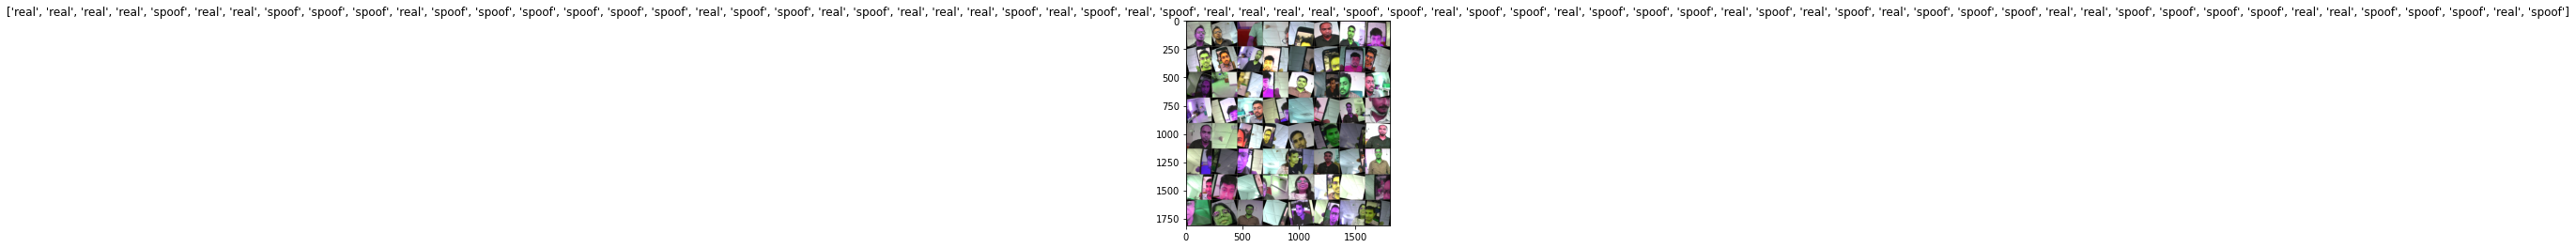

In [10]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [11]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [12]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [23]:
## Add Additional Layer
ct =0
model_f = models.resnet18(pretrained=True)
for child in model_f.children():
    ct += 1
    if ct < 13:
        for param in child.parameters():
            param.requires_grad = False
# num_ftrs = model_f.fc.in_features
class model_ftt(nn.Module):
    def __init__(self, my_pretrained_model):
        super(model_ftt, self).__init__()
        self.pretrained = my_pretrained_model
        self.my_new_layers = nn.Sequential(nn.Linear(1000, 100),
                                           nn.ReLU(),
                                           nn.Linear(100, 2))  
    def forward(self, x):
        x = self.pretrained(x)
        x = self.my_new_layers(x)
        return x
model_ft = model_ftt(my_pretrained_model=model_f)

# model_ft.add_module(module=nn.Linear(20, 2), name='fc')

# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
#model_ft.fc = nn.Linear(num_ftrs, 2)
# for parameter in model_ft.parameters():
#     parameter.requires_grad = False
# for parameter in model_ft[-5].parameters():
#     parameter.requires_grad = True
# for child in model_ft.children():
#     ct += 1
#     if ct < 2:
#         for param in child.parameters():
#             param.requires_grad = False
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [14]:
print(torchvision.__version__)
vgg_baseline.add_module(module=nn.Linear(list(vgg_baseline.children())[-1][-1].in_features, 2), name='fc')

0.12.0+cu113


NameError: name 'vgg_baseline' is not defined

In [22]:
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
    def forward(self, x):
        return x

ct =0
model_ft = models.vgg16(pretrained=True)
#model_ft.avgpool = Identity()
#model_ft = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Sequential(nn.Linear(512, 100),
                            nn.Dropout(p=.4),
                            nn.Linear(100,2))
                            
# for parameter in model_ft.parameters():
#     parameter.requires_grad = False
# for parameter in model_ft[-5].parameters():
#     parameter.requires_grad = True
for child in model_ft.children():
    ct += 1
    if ct < 9:
        for param in child.parameters():
            param.requires_grad = False
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

AttributeError: 'VGG' object has no attribute 'fc'

In [24]:
model_ft

model_ftt(
  (pretrained): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, trac

In [25]:
summary(model_ft, input_size=(1, 3, 224, 224))

Layer (type:depth-idx)                        Output Shape              Param #
model_ftt                                     --                        --
├─ResNet: 1-1                                 [1, 1000]                 --
│    └─Conv2d: 2-1                            [1, 64, 112, 112]         (9,408)
│    └─BatchNorm2d: 2-2                       [1, 64, 112, 112]         (128)
│    └─ReLU: 2-3                              [1, 64, 112, 112]         --
│    └─MaxPool2d: 2-4                         [1, 64, 56, 56]           --
│    └─Sequential: 2-5                        [1, 64, 56, 56]           --
│    │    └─BasicBlock: 3-1                   [1, 64, 56, 56]           (73,984)
│    │    └─BasicBlock: 3-2                   [1, 64, 56, 56]           (73,984)
│    └─Sequential: 2-6                        [1, 128, 28, 28]          --
│    │    └─BasicBlock: 3-3                   [1, 128, 28, 28]          (230,144)
│    │    └─BasicBlock: 3-4                   [1, 128, 28, 28]      

In [27]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=3)

Epoch 0/2
----------
train Loss: 0.1228 Acc: 0.9624
val Loss: 0.1742 Acc: 0.9500

Epoch 1/2
----------
train Loss: 0.0804 Acc: 0.9739
val Loss: 0.1630 Acc: 0.9563

Epoch 2/2
----------
train Loss: 0.0678 Acc: 0.9754
val Loss: 0.1785 Acc: 0.9600

Training complete in 1m 46s
Best val Acc: 0.959964


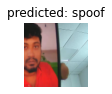

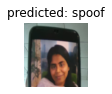

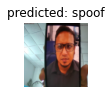

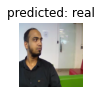

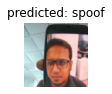

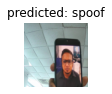

In [28]:
visualize_model(model_ft)

In [29]:
# Saving the model
save_path = './anti_spoofres.pth'
torch.save(model_ft.state_dict(), save_path)